[2048. 2142. 2234. 2324. 2410. 2491. 2566. 2634. 2694. 2745. 2787. 2820.
 2842. 2855. 2858. 2852. 2837. 2814. 2783. 2746. 2703. 2656. 2605. 2553.
 2499. 2446. 2393. 2344. 2297. 2255. 2218. 2187.]
CMSIS-DSP FFT init status: 0
CMSIS-DSP FFT magnitudes:
[65.79028     4.357707    0.73328114  0.35708615  0.23185486  0.17264917
  0.13904132  0.11774926  0.10328726  0.0930103   0.08551162  0.07997593
  0.07590459  0.07298667  0.07102145  0.06988603  0.06951523  0.06988615
  0.07102144  0.07298671  0.07590459  0.07997602  0.08551162  0.09301057
  0.10328726  0.11774955  0.13904132  0.17264925  0.23185486  0.35708615
  0.7332812   4.3577065 ]
NumPy FFT magnitudes:
[65.79028     4.357707    0.7332813   0.35708615  0.23185632  0.17264919
  0.13904132  0.11774957  0.10328563  0.09301028  0.0855122   0.07997599
  0.0759056   0.07298667  0.07102121  0.06988601  0.06951547  0.06988601
  0.07102121  0.07298667  0.0759056   0.07997599  0.0855122   0.09301028
  0.10328563  0.11774957  0.13904132  0.1726

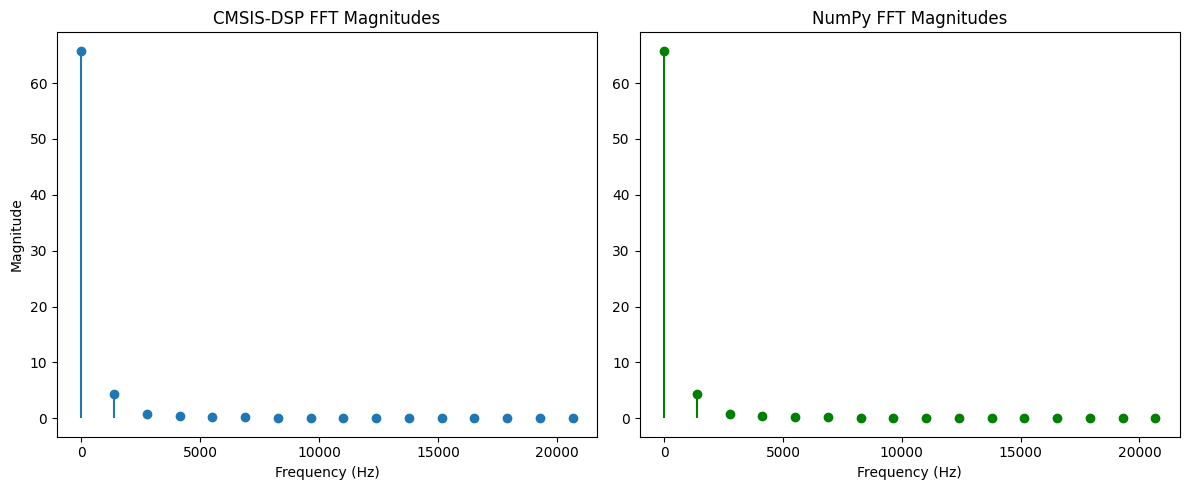

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cmsisdsp as dsp

# Parameters
fs = 44100         # Sampling frequency in Hz
N = 32             # FFT size
t = np.arange(N) / fs  # Time vector

# Frequencies for the composite signal (Hz)
frequencies = [5, 10, 100, 500, 1000]

# Create composite signal as sum of sine waves
composite = sum(np.sin(2 * np.pi * f * t) for f in frequencies)
composite_norm = composite / len(frequencies)

signal = 1.65 + composite_norm * 1.65

signal = signal.astype(np.float32)
n_signal=(signal/3.3)*(2**12-1)
print(np.round(n_signal))
# --- CMSIS-DSP FFT ---
# Create interleaved complex array: real parts at even indices, imaginary parts at odd indices.
signal_complex = np.empty(2 * N, dtype=np.float32)
signal_complex[0::2] = signal   # real parts
signal_complex[1::2] = 0.0      # imaginary parts

# Initialize the CMSIS-DSP FFT instance for float32
cfftf32 = dsp.arm_cfft_instance_f32()
status = dsp.arm_cfft_init_f32(cfftf32, N)
print("CMSIS-DSP FFT init status:", status)

# Perform the FFT using CMSIS-DSP
result_cmsis = dsp.arm_cfft_f32(cfftf32, signal_complex, 0, 1)
# Extract complex numbers: real parts at even indices, imaginary parts at odd indices.
cmsis_complex = result_cmsis[0::2] + 1j * result_cmsis[1::2]
cmsis_mag = np.abs(cmsis_complex)

# --- NumPy FFT ---
# Compute FFT using NumPy (this returns a complex array directly)
numpy_fft = np.fft.fft(signal)
numpy_mag = np.abs(numpy_fft)

# --- Compare Results ---
print("CMSIS-DSP FFT magnitudes:")
print(cmsis_mag)
print("NumPy FFT magnitudes:")
print(numpy_mag)

# Frequency vector for plotting
freq = np.fft.fftfreq(N, d=1/fs)

# Plot comparison for positive frequency bins
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.stem(freq[:N//2], cmsis_mag[:N//2], basefmt=" ")
plt.title("CMSIS-DSP FFT Magnitudes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.stem(freq[:N//2], numpy_mag[:N//2], basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("NumPy FFT Magnitudes")
plt.xlabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


Q15 interleaved input: [    0     0  3799     0  7545     0 11185     0 14668     0 17946     0
 20975     0 23716     0 26135     0 28203     0 29899     0 31208     0
 32121     0 32639     0 32767     0 32517     0 31910     0 30972     0
 29733     0 28230     0 26502     0 24594     0 22552     0 20421     0
 18252     0 16090     0 13981     0 11970     0 10096     0  8396     0
  6901     0  5637     0]
CMSIS Q15 FFT init status: 0
CMSIS Q15 FFT Magnitudes:
[0.6211548  0.2008667  0.03460693 0.01611328 0.0100708  0.00738525
 0.00598145 0.00512695 0.00445557 0.00415039 0.00378418 0.00360107
 0.00354004 0.00341797 0.00341797 0.00335693 0.00335693 0.00335693
 0.00335693 0.00341797 0.003479   0.00360107 0.00378418 0.00402832
 0.00445557 0.00500488 0.00585938 0.00726318 0.01000977 0.01599121
 0.0345459  0.20062256]
NumPy FFT Magnitudes:
[19.88510685  6.67063868  1.12248302  0.5466164   0.35491838  0.26428598
  0.21283926  0.1802471   0.15810635  0.1423772   0.13089923  0.12242482
  0.

/var/folders/jj/bsv3kb8d5d74wpmpxvb5y4380000gn/T/ipykernel_58477/2969026093.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  result_q15_complex_float = result_q15_complex.astype(np.float32) / 32768.0


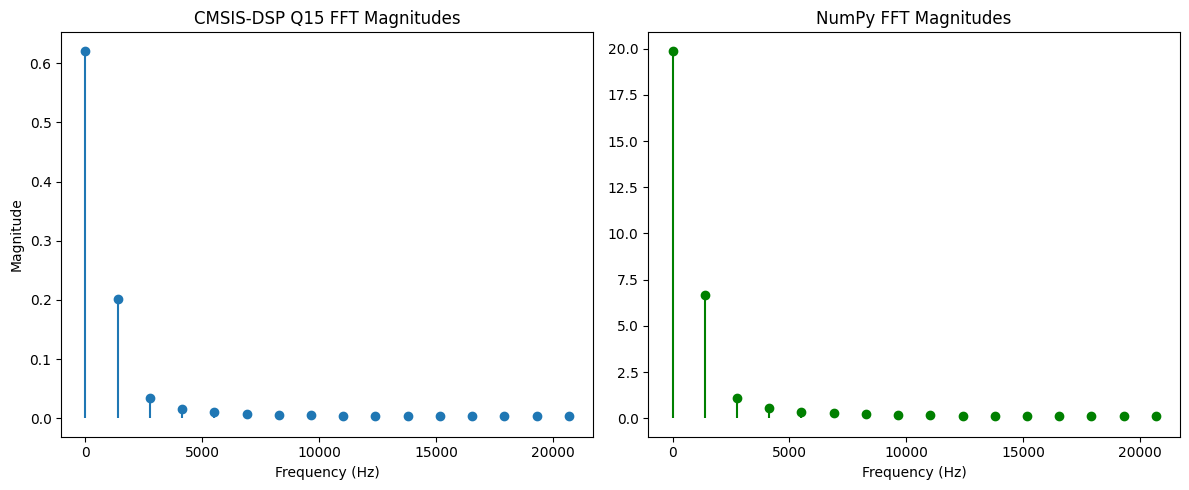

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cmsisdsp as dsp

# Parameters
fs = 44100         # Sampling frequency in Hz
N = 32             # FFT size (number of complex samples)
t = np.arange(N) / fs  # Time vector

# Frequencies for composite signal (Hz)
frequencies = [5, 10, 100, 500, 1000]

# Create composite signal as the sum of sine waves
signal = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Normalize the signal to the range [-1, 1] to avoid clipping in Q15
max_val = np.max(np.abs(signal))
if max_val > 0:
    signal = signal / max_val

# Convert to Q15: multiply by 32767 (for Q15, range is -32768 to 32767) and cast to int16
q15_signal = (signal * 32767).astype(np.int16)

# Create interleaved array for Q15 FFT input:
# Even indices hold the real parts, odd indices hold the imaginary parts (set to 0)
q15_complex = np.empty(2 * N, dtype=np.int16)
q15_complex[0::2] = q15_signal   # real parts
q15_complex[1::2] = 0            # imaginary parts

print("Q15 interleaved input:", q15_complex)

# --- CMSIS-DSP Q15 FFT ---
# Initialize the CMSIS Q15 FFT instance
cfftq15 = dsp.arm_cfft_instance_q15()
status = dsp.arm_cfft_init_q15(cfftq15, N)
print("CMSIS Q15 FFT init status:", status)

# Perform the Q15 FFT.
# Parameters: FFT instance, input array, ifftFlag (0 for FFT), and bitReverseFlag (usually 1)
result_q15 = dsp.arm_cfft_q15(cfftq15, q15_complex, 0, 1)

# Convert the Q15 FFT result (still in interleaved int16) into a complex number array
# Divide by 32768.0 to convert from Q15 back to floating point approximation
result_q15_complex = result_q15[0::2] + 1j * result_q15[1::2]
result_q15_complex_float = result_q15_complex.astype(np.float32) / 32768.0
q15_magnitude = np.abs(result_q15_complex_float)

# --- NumPy FFT for Comparison ---
# Compute FFT using NumPy on the normalized floating point signal
numpy_fft = np.fft.fft(signal)
numpy_magnitude = np.abs(numpy_fft)

# Frequency axis for plotting
freq = np.fft.fftfreq(N, d=1/fs)

# Print out FFT magnitudes for comparison
print("CMSIS Q15 FFT Magnitudes:")
print(q15_magnitude)
print("NumPy FFT Magnitudes:")
print(numpy_magnitude)

# --- Plotting ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(freq[:N//2], q15_magnitude[:N//2], basefmt=" ")
plt.title("CMSIS-DSP Q15 FFT Magnitudes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1, 2, 2)
plt.stem(freq[:N//2], numpy_magnitude[:N//2], basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("NumPy FFT Magnitudes")
plt.xlabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


Bin 0: 32767.0
Bin 1: 34803.55859375
Bin 2: 7281.388671875
Bin 3: 3543.1962890625
Bin 4: 2283.127685546875
Bin 5: 1717.6728515625
Bin 6: 1374.1383056640625
Bin 7: 1166.3551025390625
Bin 8: 1009.1422729492188
Bin 9: 918.1546630859375
Bin 10: 850.2611083984375
Bin 11: 804.6265869140625
Bin 12: 756.7509155273438
Bin 13: 731.2892456054688
Bin 14: 710.5153198242188
Bin 15: 705.634521484375
Bin 16: 18526.109375
Bin 17: 7.071067810058594
Bin 18: 1.4142135381698608
Bin 19: 1.4142135381698608
Bin 20: 22.0
Bin 21: 1.4142135381698608
Bin 22: 29342.556640625
Bin 23: 6403.3427734375
Bin 24: 6436.513671875
Bin 25: 256.0
Bin 26: 18504.5859375
Bin 27: 1.0
Bin 28: 18504.5859375
Bin 29: 20018.0390625
Bin 30: 64.0
Bin 31: 5474.50732421875


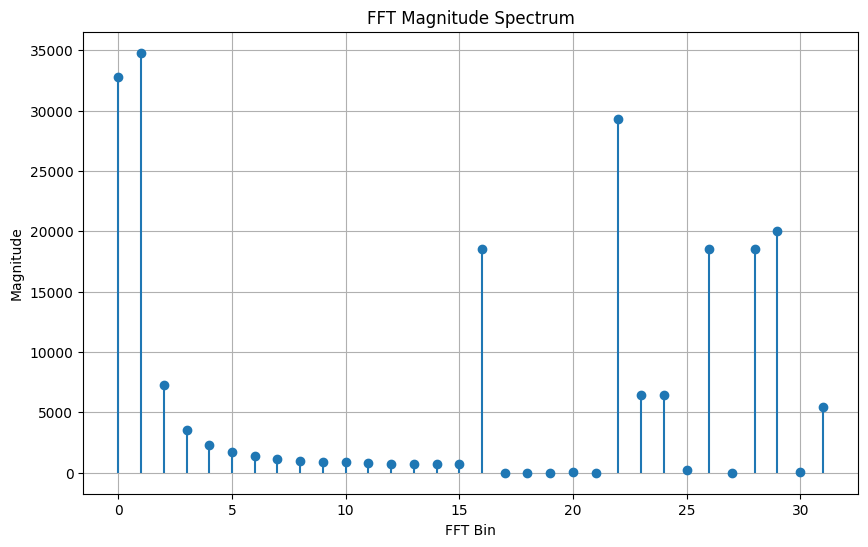

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# FFT output values (64 values: even indices = real, odd indices = imaginary)
fft_vals = [
    32767, 0,
    -32768, -11728,
    -7168, 1280,
    -3328, 1216,
    -2064, 976,
    -1520, 800,
    -1216, 640,
    -1040, 528,
    -912, 432,
    -848, 352,
    -800, 288,
    -768, 240,
    -736, 176,
    -720, 128,
    -704, 96,
    -704, 48,
    -16616, 8193,
    -7, -1,
    -1, -1,
    -1, -1,
    22, 0,
    -1, -1,
    29271, 2048,
    6067, 2048,
    6102, 2048,
    0, 256,
    -16592, 8193,
    1, 0,
    -16592, 8193,
    19913, 2048,
    64, 0,
    5077, 2048
]

# Convert list to a numpy array of type int16
fft_vals = np.array(fft_vals, dtype=np.int16)

# Separate the interleaved real and imaginary parts
reals = fft_vals[0::2]
imags = fft_vals[1::2]

# Create a complex array
fft_complex = reals.astype(np.float32) + 1j * imags.astype(np.float32)

# Compute magnitude for each FFT bin
magnitude = np.abs(fft_complex)

# Print out magnitudes for each FFT bin
for i, mag in enumerate(magnitude):
    print(f"Bin {i}: {mag}")

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.stem(magnitude, basefmt=" ")
plt.xlabel("FFT Bin")
plt.ylabel("Magnitude")
plt.title("FFT Magnitude Spectrum")
plt.grid(True)
plt.show()


Q15 interleaved input: [    0     0  3799     0  7545     0 11185     0 14668     0 17946     0
 20975     0 23716     0 26135     0 28203     0 29899     0 31208     0
 32121     0 32639     0 32767     0 32517     0 31910     0 30972     0
 29733     0 28230     0 26502     0 24594     0 22552     0 20421     0
 18252     0 16090     0 13981     0 11970     0 10096     0  8396     0
  6901     0  5637     0]
CMSIS Q15 FFT init status: 0
CMSIS Q15 FFT Magnitudes:
[0.6211548  0.2008667  0.03460693 0.01611328 0.0100708  0.00738525
 0.00598145 0.00512695 0.00445557 0.00415039 0.00378418 0.00360107
 0.00354004 0.00341797 0.00341797 0.00335693 0.00335693 0.00335693
 0.00335693 0.00341797 0.003479   0.00360107 0.00378418 0.00402832
 0.00445557 0.00500488 0.00585938 0.00726318 0.01000977 0.01599121
 0.0345459  0.20062256]
NumPy FFT Magnitudes:
[19.88510685  6.67063868  1.12248302  0.5466164   0.35491838  0.26428598
  0.21283926  0.1802471   0.15810635  0.1423772   0.13089923  0.12242482
  0.

/var/folders/jj/bsv3kb8d5d74wpmpxvb5y4380000gn/T/ipykernel_58477/3239644120.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  result_q15_complex_float = result_q15_complex.astype(np.float32) / 32768.0


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

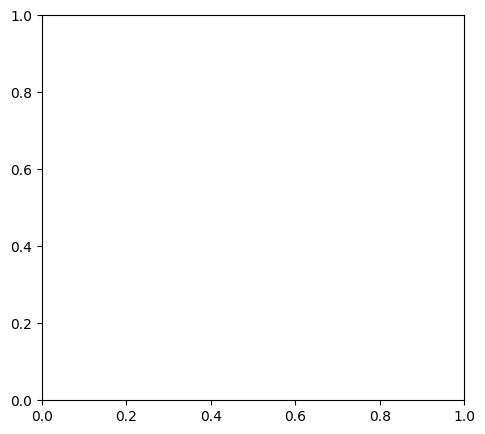

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmsisdsp as dsp

# Parameters
fs = 44100         # Sampling frequency in Hz
N = 32             # FFT size (number of complex samples)
t = np.arange(N) / fs  # Time vector

# Frequencies for composite signal (Hz)
frequencies = [5, 10, 100, 500, 1000]

# --- Create Composite Signal ---
# Sum sine waves
signal = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Normalize the signal to the range [-1, 1] (to avoid clipping when converting to Q15)
max_val = np.max(np.abs(signal))
if max_val > 0:
    signal = signal / max_val

# --- Convert Signal to Q15 Format ---
# Q15 represents values in the range [-32768, 32767].
# Multiply by 32767 (or 32768, depending on your convention) and cast to int16.
q15_signal = (signal * 32767).astype(np.int16)

# Create an interleaved array for Q15 FFT input:
# Even indices: real parts, odd indices: imaginary parts (set to 0 for a real signal).
q15_complex = np.empty(2 * N, dtype=np.int16)
q15_complex[0::2] = q15_signal   # real parts
q15_complex[1::2] = 0            # imaginary parts

print("Q15 interleaved input:", q15_complex)

# --- CMSIS-DSP Q15 FFT ---
# Initialize the CMSIS Q15 FFT instance.
cfftq15 = dsp.arm_cfft_instance_q15()
status = dsp.arm_cfft_init_q15(cfftq15, N)
print("CMSIS Q15 FFT init status:", status)

# Perform the Q15 FFT.
# The parameters are: FFT instance, input array, ifftFlag (0 for FFT), and bitReverseFlag (usually 1).
result_q15 = dsp.arm_cfft_q15(cfftq15, q15_complex, 0, 1)

# Convert the Q15 FFT result (still in interleaved int16 format) into a complex number array.
# Divide by 32768.0 to convert the Q15 values back to a floating point approximation.
result_q15_complex = result_q15[0::2] + 1j * result_q15[1::2]
result_q15_complex_float = result_q15_complex.astype(np.float32) / 32768.0

# Compute the magnitude spectrum.
q15_magnitude = np.abs(result_q15_complex_float)

# --- NumPy FFT for Comparison ---
# Compute FFT using NumPy on the normalized floating point signal.
numpy_fft = np.fft.fft(signal)
numpy_magnitude = np.abs(numpy_fft)

# --- Frequency Axis for Plotting ---
freq = np.fft.fftfreq(N, d=1/fs)

# Print out FFT magnitudes for comparison.
print("CMSIS Q15 FFT Magnitudes:")
print(q15_magnitude)
print("NumPy FFT Magnitudes:")
print(numpy_magnitude)

# --- Plotting the Results ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(freq[:N//2], q15_magnitude[:N//2], basefmt=" " )
plt.title("CMSIS-DSP Q15 FFT Magnitudes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1, 2, 2)
plt.stem(freq[:N//2], numpy_magnitude[:N//2], basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("NumPy FFT Magnitudes")
plt.xlabel("Frequency (Hz)")

plt.tight_layout()
plt.show()